In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read csv file
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [3]:
# Taking a look at the first 5 rows of the dataset
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# Checking the shape (size) of dataset
df.shape

(858, 36)

In [5]:
# Checking the columns' data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
# Getting the statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0
Dx:Cancer,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx:CIN,858.0,0.010490,0.101939,0.0,0.0,0.0,0.0,1.0
Dx:HPV,858.0,0.020979,0.143398,0.0,0.0,0.0,0.0,1.0
Dx,858.0,0.027972,0.164989,0.0,0.0,0.0,0.0,1.0
Hinselmann,858.0,0.040793,0.197925,0.0,0.0,0.0,0.0,1.0
Schiller,858.0,0.086247,0.280892,0.0,0.0,0.0,0.0,1.0
Citology,858.0,0.051282,0.220701,0.0,0.0,0.0,0.0,1.0
Biopsy,858.0,0.064103,0.245078,0.0,0.0,0.0,0.0,1.0


# Data Cleaning

In [7]:
# Checking for the missing values
df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
# Checking for the duplicates
df.duplicated().sum()

23

In [9]:
# Handling the duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

# Data Visualization

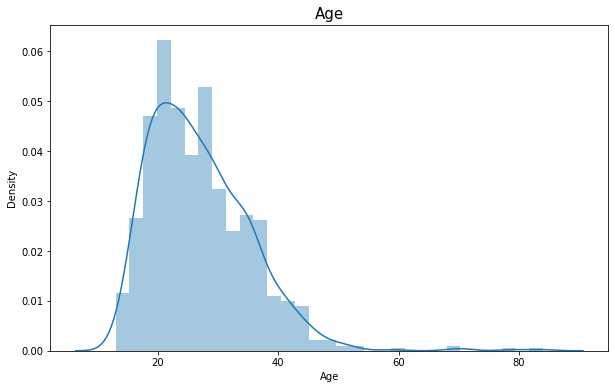

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df["Age"])
plt.title("Age", size=15)
plt.show()

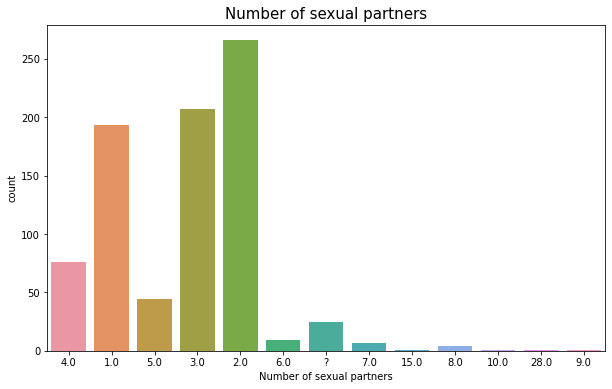

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df["Number of sexual partners"])
plt.title("Number of sexual partners", size=15)
plt.show()

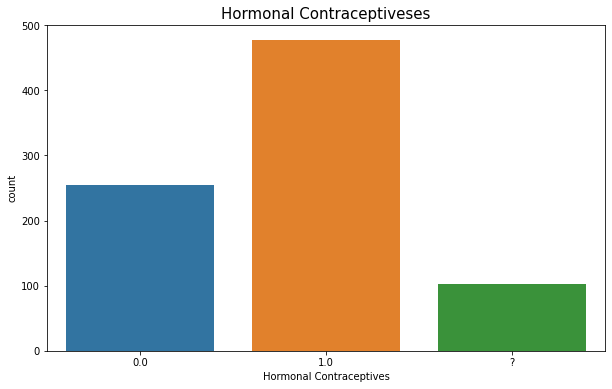

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df["Hormonal Contraceptives"])
plt.title("Hormonal Contraceptiveses", size=15)
plt.show()

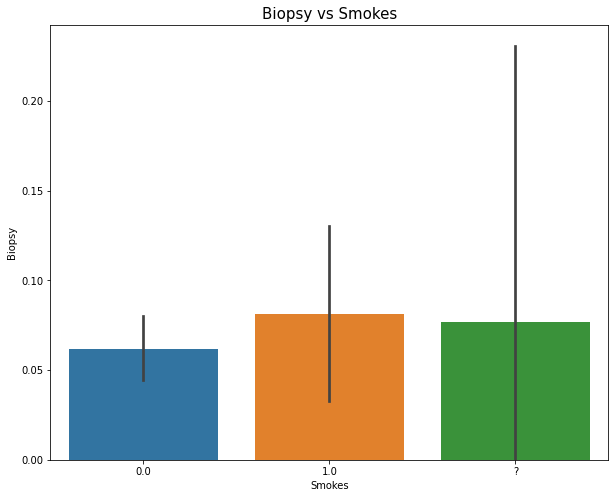

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["Smokes"], y=df["Biopsy"])
plt.title("Biopsy vs Smokes", size=15)
plt.show()

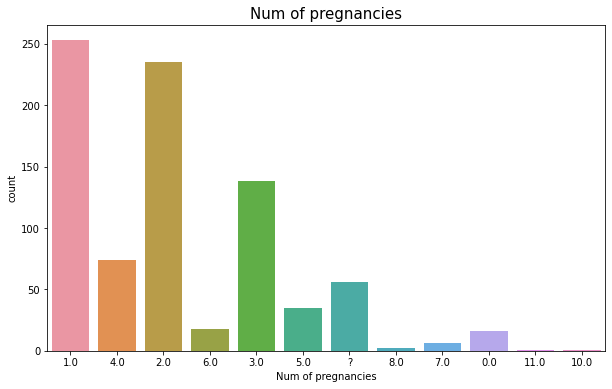

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df["Num of pregnancies"])
plt.title("Num of pregnancies", size=15)
plt.show()

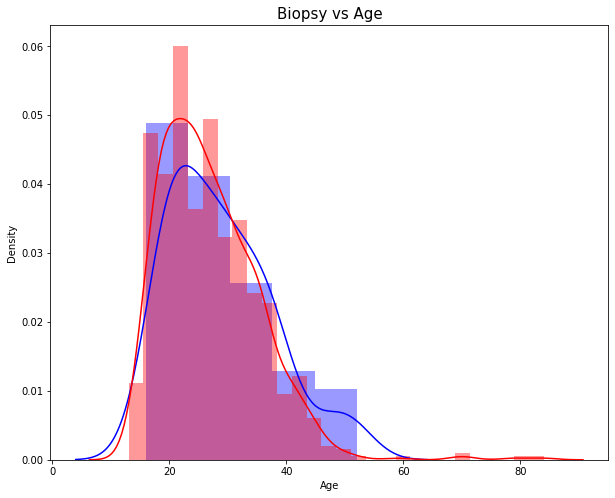

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["Biopsy"]==1]["Age"], color="blue")
sns.distplot(df[df["Biopsy"]==0]["Age"], color="red")
plt.title("Biopsy vs Age", size=15)
plt.show()

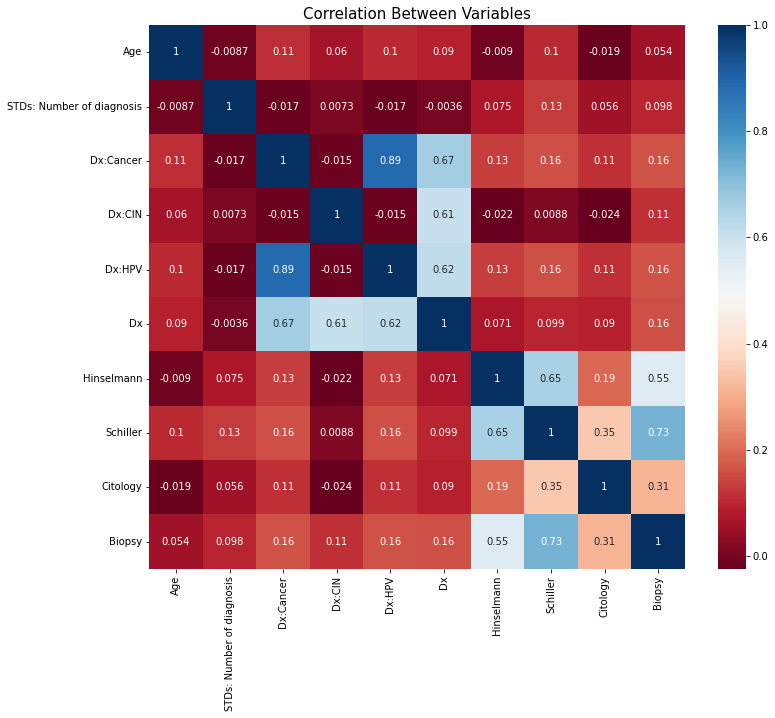

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlation Between Variables", size=15)
plt.show()

# Data Preprocessing

In [18]:
# Split the data into X, y datasets
features = ["Age", "STDs: Number of diagnosis", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller", "Citology"]
X = df[features]
y = df["Biopsy"]

In [19]:
# Standardizing the data
ss = StandardScaler()
X = ss.fit_transform(X)

In [20]:
X = pd.DataFrame(X, columns=["Age", "STDs: Number of diagnosis", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller", "Citology"])
y = pd.DataFrame(y, columns=["Biopsy"])

In [21]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)